In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from db import *

In [46]:
vgsales = get_db()
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Análise de franquias de sucesso

Faremos a seguir uma análise de algumas franquias de sucesso (que não são de iniciativa Nintendo, já que essas foram comparadas anteriormente), buscando analisar se as tendências gerais de mercado que se evidenciaram no início da análise exploratória se mantém nessas franquias de jogos, ou seja, se a "chave" do sucesso no universo dos *games* é seguir as tendências de mercado ou buscar inovações.

## LEGO

Iniciaremos estudando a franquia de jogos da LEGO, que está no mercado dos games há mais de 20 anos, e para isso vamos modificar a base de dados, criando um subset que contenha apenas jogos com a palavra "LEGO" no nome (o que, no caso da LEGO, ocorre em todos os jogos), que nos auxiliará na construção de gráficos da franquia de jogos.

Encontramos 148 jogos e trabalharemos com eles para essa análise. A parte do subset exibida a seguir nos apresenta algumas tendências que podemos buscar comprovar. Por exemplo, pelos últimos itens da base, entre as opções de `Platform` dos jogos, os de PC parecem não ter muita aceitação, então podemos tentar explorar essa suposição. Vamos realizar uma plotagem para testar essa hipótese:


In [47]:
lego = vgsales[vgsales.Name.str.contains("LEGO")]
lego

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
150,151,LEGO Star Wars: The Complete Saga,Wii,2007,Action,LucasArts,3.66,1.63,0.00,0.53,5.83
212,213,LEGO Star Wars: The Complete Saga,DS,2007,Action,LucasArts,2.89,1.54,0.00,0.46,4.90
324,325,LEGO Indiana Jones: The Original Adventures,X360,2008,Action,Activision,2.40,1.03,0.00,0.36,3.78
364,365,LEGO Star Wars: The Video Game,PS2,2005,Action,Eidos Interactive,1.98,1.14,0.01,0.41,3.53
394,395,LEGO Batman: The Videogame,X360,2008,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0.00,0.32,3.38
...,...,...,...,...,...,...,...,...,...,...,...
14352,14355,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,Unknown,0.00,0.03,0.00,0.00,0.03
14884,14887,LEGO Pirates of the Caribbean: The Video Game,PC,2011,Action,Disney Interactive Studios,0.02,0.00,0.00,0.00,0.03
14960,14963,LEGO Harry Potter: Years 1-4,PC,2010,Action,Warner Bros. Interactive Entertainment,0.01,0.01,0.00,0.00,0.02
15745,15748,LEGO Star Wars II: The Original Trilogy,PC,2006,Action,Activision,0.00,0.01,0.00,0.00,0.02


Vamos inicialmente fazer uma visualização das vendas globais dos jogos da LEGO através dos anos:

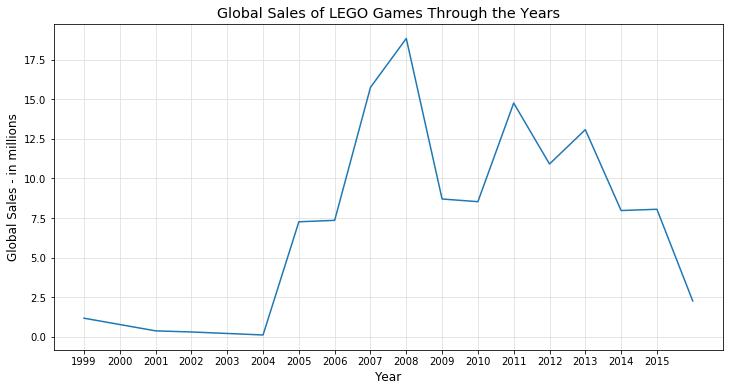

In [48]:
#Criamos um subset agrupando por ano e somando as vendas globais, além de retirarmos os anos NA (que havíamos definido como -1)
lego_y = lego.groupby(["Year"],as_index=False)[["Global_Sales"]].sum()
lego_y = lego_y[lego_y.Year!= -1]

#Criamos o frame
plt.figure(figsize=(12, 6))

#Fazemos a plotagem
plt.plot(lego_y["Year"], lego_y["Global_Sales"])  

#Definindo os eixos e detalhes de labels, etc.
plt.xticks(range(1999,2016))
plt.xlabel("Year", size="large")
plt.ylabel("Global Sales - in millions", size="large")
plt.title("Global Sales of LEGO Games Through the Years", size="x-large")
plt.grid(color='#E0DFDC')

plt.show()

Fica clara, a partir do gráfico, a época em que os jogos se tornaram mais populares, que coincide com o início da 7ª geração dos videogames - início em 2005 -, que compreende o lançamento do Xbox 360, do Playstation 3 e do Nintendo Wii, além do Nintendo DS e PSP entre os portáteis. Apesar de haver uma caída em 2008, os jogos permanecem populares até haver um real decréscimo a partir de 2013.

Podemos investigar essas vendas mais a fundo, analisando sua subdivisão entre as regiões de vendas:

Criaremos um mini subset que agrupa os jogos por plataforma, fazendo a contagem da pela coluna `Name`, e outro mini subset que faz o mesmo agrupamento, mas contabiliza a soma das vendas globais. Em seguida, adicionei a coluna das vendas globais no primeiro subset.

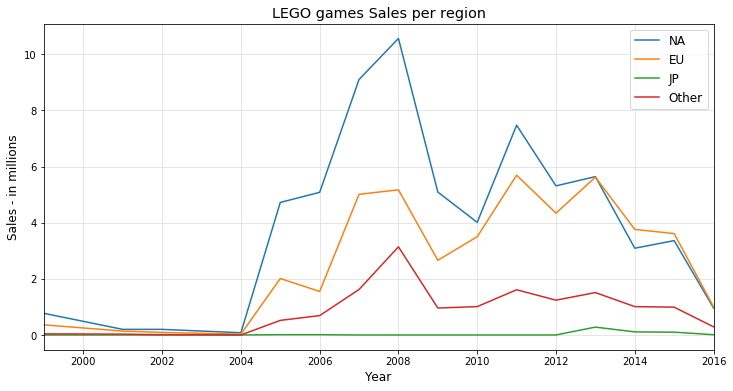

In [49]:
#Retiramos os NA
lego = lego[lego.Year!= -1]

#Criamos o frame
plt.figure(figsize=(12, 6))

#O processo aqui é o mesmo das vendas globais, mas repetido para cada linha, que é o formato default do plot
lego.groupby('Year')['NA_Sales'].sum().plot(label="NA")
lego.groupby('Year')['EU_Sales'].sum().plot(label="EU")
lego.groupby('Year')['JP_Sales'].sum().plot(label="JP")
lego.groupby('Year')['Other_Sales'].sum().plot(label="Other")

#Adição de detalhes, legendas...
plt.legend(prop={'size': 12})
plt.title("LEGO games Sales per region", size="x-large")
plt.xlabel("Year", size="large")
plt.ylabel("Sales - in millions", size="large")
plt.grid(color='#E0DFDC')

plt.show()

Fica clara, aqui, a predominância do mercado NA (América do Norte), o que não é uma surpresa, uma vez que este é o mercado de jogos de prevalência mundial. No entanto, é interessante avaliar o crescimento colevito anterior a 2008, imagem da distribuição mundial de jogos da LEGO. É notável, no entanto que de 2004 a 2006, o crescimento das vendas NA foram muito rápidas, enquanto no resto do mundo essa subida aconteceu mais lentamente. 

Além disso, na última década, as vendas na região EU (Europa) chegaram a alcançar as mundiais em jogos LEGO! Vamos investigar mais a fundo esse fato, começando por criar um subset para análise do invetimento em plataformas.

In [50]:
#Agrupamos por plataforma, contamos a quantidade de jogos, e fazemos o mesmo com as vendas globais, juntando os subsets
lego_plat = lego.groupby("Platform",as_index=False)[["Name"]].count()
lego_sales = lego.groupby("Platform",as_index=False)[["Global_Sales"]].sum()
lego_sales['Games'] = lego_plat['Name']
lego_sales.head()

,Platform,Global_Sales,Games
0,3DS,7.51,13
1,DS,21.82,15
2,GBA,1.62,6
3,GC,2.38,2
4,N64,0.71,1


Desejamos, agora, comparar o investimento em jogos (pela quantidade, já que não temos dados do custo de produção) e o retorno (em vendas gloabais). Para a plotagem, criamos um array com o tamanho da quantidade de plataformas, e como faremos a união de dois subplots (uma vez que queremos barras duplas em diferentes escalas), utilizaremos a manipulação de eixos (ax e ax2):

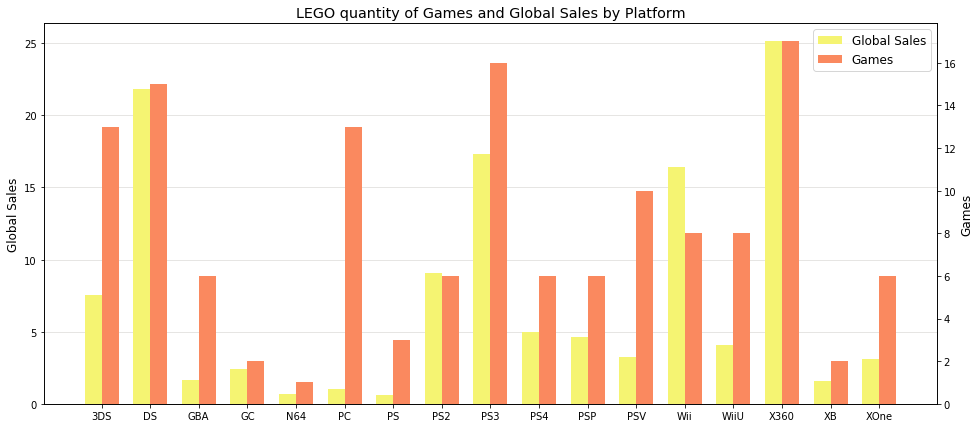

In [56]:
#Criamos o frame
plt.figure(figsize=(16,7))

#Criamos um array para a construção do eixo x
x = np.arange(len(lego_sales['Platform']))

#Definimos o tamanho de cada barra
barra=0.35

#Criamos os eixos "gêmeos", que dividem o eixo x e plotamos os gráficos, alterando manualmente sua posição para que não haja sobreposição
ax = plt.subplot(1,1,1)
sales =ax.bar(x, lego_sales['Global_Sales'], width=barra, color='#F5F472')
ax2 = ax.twinx()
games = ax2.bar(x + barra, lego_sales['Games'], width=barra, color='#FA895F')

#Detalhes, labels, etc.
plt.xticks(x + barra/2, lego_sales['Platform'])
ax.set_ylabel('Global Sales',size="large" )
ax2.set_ylabel('Games', size="large")
plt.legend([sales,games],['Global Sales','Games'],prop={'size': 12})
plt.title("LEGO quantity of Games and Global Sales by Platform", size="x-large")
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E0DFDC')
plt.show()


A partir dessa plotagem é possível investigar a resposta do público dos investimentos da LEGO no mundo dos jogos. Por exemplo, os investimentos em jogos de DS e X360 tiveram um ótimo retorno, e os de Wii tiveram ainda mais sucesso quando comparados à quantidade de jogos produzidos! Na verdade, é a única plataforma em que esse evento ocorreu de forma tão intensa. Parece um erro, dessa forma, que a LEGO tenha produzido tantos jogos para o 3DS, por exemplo, e não tenha se dedicado ainda mais aos jogos de Wii.

Essa nova observação condiz, ainda, com o gráfico que vimos anteriormente. Os jogos de 7ª geração realmente contaram com muitas vendas- e em geral foram muito produzidos. Por outro lado, a quantidade de jogos de PC está entre as mais altas dentre as plataformas, enquanto as vendas são mínimas! Essa diferença é bem clara na plataforma, que está dentre as que possuem mais jogos. Essa inisitência foi, possivelmente, um erro da LEGO.

Temos interesse, agora, em analisar algumas subfranquias bem conhecidas da LEGO, comparando suas vendas regionais e globais. Para isso, inicialmente, faremos o reconhecimento desses jogos por palavras relevantes dentro das strings, criando subsets apenas com os jogos de cada subfranquia:

In [52]:
harry_potter = lego[(lego.Name.str.contains("Harry"))]
harry_potter.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
618,619,LEGO Harry Potter: Years 1-4,Wii,2010,Action,Warner Bros. Interactive Entertainment,1.29,0.97,0.0,0.23,2.49
671,673,LEGO Harry Potter: Years 1-4,DS,2010,Action,Warner Bros. Interactive Entertainment,1.07,1.05,0.0,0.23,2.35
1166,1168,LEGO Harry Potter: Years 1-4,X360,2010,Action,Warner Bros. Interactive Entertainment,0.95,0.50,0.0,0.14,1.59
1420,1422,LEGO Harry Potter: Years 1-4,PS3,2010,Action,Warner Bros. Interactive Entertainment,0.55,0.60,0.0,0.22,1.37
2886,2888,LEGO Harry Potter: Years 1-4,PSP,2010,Action,Warner Bros. Interactive Entertainment,0.14,0.37,0.0,0.19,0.71


O subset criado para jogos do 'Harry Potter' está acima como exemplo, mas faremos o mesmo para as outras subfranquias mais famosas da LEGO.

In [53]:
star_wars = lego[(lego.Name.str.contains("Star Wars"))]
indiana = lego[(lego.Name.str.contains("Indiana"))]
batman = lego[(lego.Name.str.contains("Batman"))]
marvel = lego[(lego.Name.str.contains("Marvel"))]

Agora podemos unir esses subsets em um único dataframe, realizando de uma vez a soma das vendas por regiões.

In [54]:
franq = pd.DataFrame({"Franchises" : ["Harry Potter", "Star Wars", "Indiana Jones", "Batman", "Marvel"],
        "Global" : [harry_potter["Global_Sales"].sum(), star_wars["Global_Sales"].sum(), indiana["Global_Sales"].sum(), batman["Global_Sales"].sum(),  marvel["Global_Sales"].sum()],
        "NA" : [harry_potter["NA_Sales"].sum(), star_wars["NA_Sales"].sum(), indiana["NA_Sales"].sum(), batman["NA_Sales"].sum(), marvel["NA_Sales"].sum()],
        "EU" : [harry_potter["EU_Sales"].sum(), star_wars["EU_Sales"].sum(), indiana["EU_Sales"].sum(), batman["EU_Sales"].sum(), marvel["EU_Sales"].sum()],
        "JP" : [harry_potter["JP_Sales"].sum(), star_wars["JP_Sales"].sum(), indiana["JP_Sales"].sum(), batman["JP_Sales"].sum(), marvel["JP_Sales"].sum()],
        "Other" : [harry_potter["Other_Sales"].sum(), star_wars["Other_Sales"].sum(), indiana["Other_Sales"].sum(), batman["Other_Sales"].sum(), marvel["Other_Sales"].sum()]})

franq

,Franchises,Global,NA,EU,JP,Other
0,Harry Potter,8.77,4.10,3.60,0.00,1.06
1,Star Wars,37.92,22.85,11.38,0.02,3.65
2,Indiana Jones,14.89,8.17,4.32,0.00,2.43
3,Batman,15.55,8.68,4.88,0.00,1.98
4,Marvel,12.12,5.37,5.14,0.09,1.52


É possível notar pela tabela como os jogos de Star Wars tem a maior aceitação em mercado. Faremos uma visualização simples para tornar a diferença mais visual:

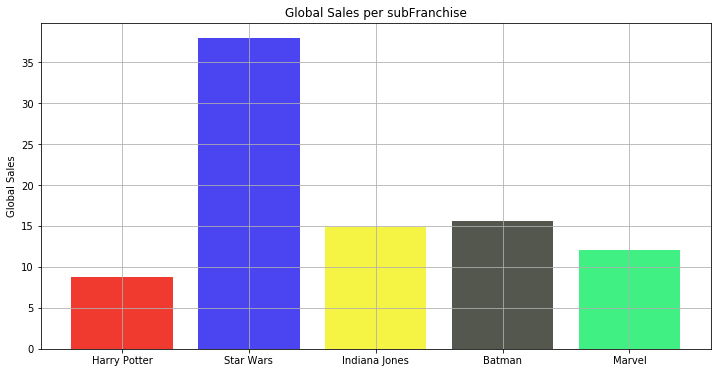

In [55]:
plt.figure(figsize=(12,6))
plt.bar(franq.Franchises, franq.Global, color=['#F03A30','#4A45F0' ,'#F5F444', '#54574E','#40F083'])
plt.ylabel("Global Sales")
plt.title("Global Sales per subFranchise")
plt.show()

As vendas globais da franquia Star Wars tem um destaque absoluto entre as outras. Faremos, então, um gráfico de radar apenas para essa franquia, com o objetivo de compreender sua distribuição entre as regiões de venda de jogos, e um comparativo entre as outras franquias, que têm escala mais próxima.

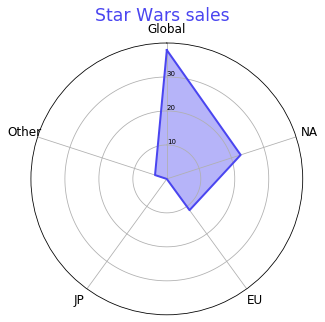

In [13]:
#Criamos o frame
plt.figure(figsize=(5,5))

# Definimos n com o número de variáveis analisadas (nesse caso as sales)
categorias=list(franq)[1:]
N = len(categorias)
  
#Definimos o ângulo em que cada sale será mostrado, são os eixos do que será um gráfico polar
angulo= [n / float(N) * 2 * np.pi for n in range(N)]
angulo += angulo[:1]
    
#Criamos o plot como polar e definimos a ordenação das regiões de vendas no gráfico    
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
    
#Detalhes de labels e escolha de escalas   
plt.xticks(angulo[:-1], categorias, color='black', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="black", size=7)
plt.ylim(0,40)
    
#Adição da representação dos dados, nesse caso de Star Wars    
valor = franq.loc[1].drop('Franchises').values.flatten().tolist()
valor += valor[:1]
ax.plot(angulo, valor, '#4A45F0', linewidth=2, linestyle='solid')
ax.fill(angulo, valor, '#4A45F0', alpha=0.4)
ax.tick_params(axis='x', labelsize='large')

plt.suptitle('Star Wars sales', size="xx-large", color='#4A45F0')
plt.show()

É possível notar estudar a distribuição da subfranquia a partir deste gráfico. Não há vendas na região do Japão, e a maior aceitação ocorre na América do Norte, como é de se esperar, uma vez que Star Wars tem produção inteiramente estadounidense. No entanto, as vendas europeias também são bem altas! Vamos visualizar a comparação entre as outras franquias:

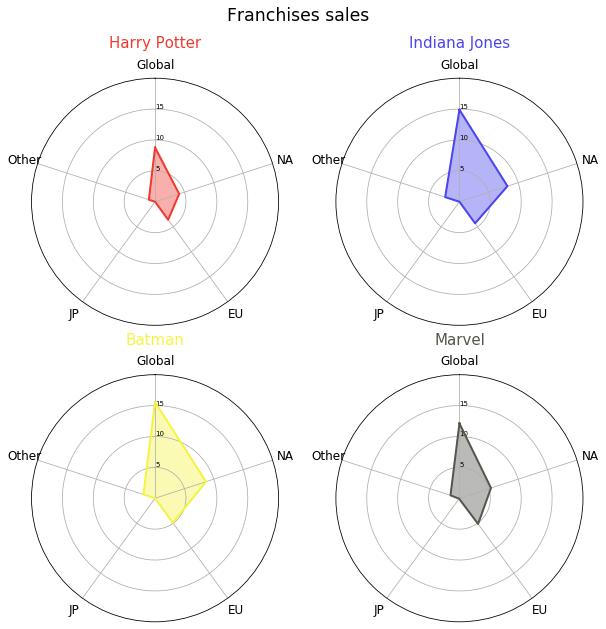

In [14]:
#Fazemos um drop dos dados de Star Wars para facilitar a plotagem, corrigindo o index
franq = franq[franq['Franchises'] != 'Star Wars']
franq.reset_index(drop=True, inplace=True)

#A ideia aqui é semelhante ao feito para a plotagem de Star Wars, mas definimos uma função que cria o gráfico para facilitar o processo
def radar(franquia, titulo, cor):
    categorias=list(franq)[1:]
    N = len(categorias)
    
    angulo= [n / float(N) * 2 * np.pi for n in range(N)]
    angulo += angulo[:1]
    
    ax = plt.subplot(2,2, franquia+1, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angulo[:-1], categorias, color='black', size=8) 
    ax.set_rlabel_position(0)
    plt.yticks([5,10,15], ["5","10","15"], color="black", size=7)
    plt.ylim(0,20)
    
    valor = franq.loc[franquia].drop('Franchises').values.flatten().tolist()
    valor += valor[:1]
    ax.plot(angulo, valor, color=cor, linewidth=2, linestyle='solid')
    ax.fill(angulo, valor, color=cor, alpha=0.4)
    ax.tick_params(axis='x', labelsize='large')
    
    #Definimos título internamente também para que os subplots sejam identificados
    plt.title(titulo, size=15, color=cor, y=1.1)
    

#Criamos a figura do plot
plt.figure(figsize=(10,10))

#Definimos uma paleta
paleta = np.array(['#F03A30','#4A45F0' ,'#F5F444', '#54574E','#40F083'])

#Criamos um loop de repetição que utiliza a função radar e cria os subplots
for franquia in range(0, len(franq.Franchises)):
    radar(franquia=franquia, titulo=''+franq['Franchises'][franquia], cor=paleta[franquia])

#Adicionamos o título do gráfico completo
plt.suptitle('Franchises sales', size="xx-large")    
plt.show()    

Vemos novamente a maior venda como a Global, claro, já que é a soma de todas as outras. Novamente não temos vendas JP, como havia sido exposto na própria tabela. 

Mas a comparação aqui demonstra fatos muito interessantes! Todos os jogos, dentre regiões específicas, têm prevalência de vendas na região NA, que é sabidamente o maior mercado de games. No entanto, enquanto os jogos do Indiana Jones e do Batman (e do Star Wars, como é possível visualizar no gráfico anterior), de criação norte americana, têm essa característica de forma acentuada (NA muito maior que outras regiões), os jogos de Harry Potter, de autoria britânica, têm quase um equilíbrio, sendo as vendas na Europa muito próximas às da America do Norte.

O fato mais surpreendente aqui é que os jogos da Marvel, também americana, seguem a tendência de Harry Potter, e não das outras produções americanas. Esse fato pode indicar um grande sucesso dos Vingadores (sequência de filmes representados nos jogos da LEGO da Marvel) no continente ou, uma vez que são (junto a Harry Potter), a franquia mais recente, indicar avanço da globalização. Essa situação pode explicar a aproximação das vendas NA e EU que ocorreu na última década conforme o gráfico de vendas por região através dos anos. Não sabemos, porém, a exata distribuição dessas vendas através dos anos. Por isso, vamos fazer outra plotagem:

In [21]:
#Vamos retirar os valores NA dos subsets criados para cada subfranquia
franquias = [harry_potter, star_wars, indiana, batman, marvel]
for franquia in franquias:
    franquia = franquia[franquia.Year!= -1]

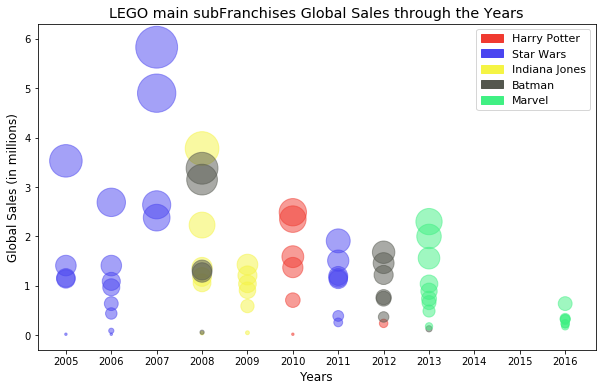

In [22]:
#Criamos o frame
plt.figure(figsize=(10, 6))

#Fazemos os scatter plots, definindo o tamanho de cada ponto de acordo com as vendas globais por jogo,
#e a cor de acordo com a mesma paleta 
franquias = [harry_potter, star_wars, indiana, batman, marvel]
n=0
for franquia in franquias:
    plt.scatter(franquia.Year, franquia.Global_Sales, s=300*franquia.Global_Sales, alpha=0.5, c=paleta[n])
    n=n+1
    

#Criamos a legenda pela ferramenta Patch do matplotlib.patches, já que pela função legend do matplotlib.pyplot a 
#legenda acompanhava o tamanho das "bolinhas"
hp = mpatches.Patch(color=paleta[0], label='Harry Potter')
sw = mpatches.Patch(color=paleta[1], label='Star Wars')
ind = mpatches.Patch(color=paleta[2], label='Indiana Jones')
bat = mpatches.Patch(color=paleta[3], label='Batman')
mv = mpatches.Patch(color=paleta[4], label='Marvel')

#Adicionamos mais detalhes
plt.xticks(np.arange(2005, 2017, 1.0))
plt.xlabel('Years',size="large")
plt.ylabel('Global Sales (in millions)',size="large")
plt.title('LEGO main subFranchises Global Sales through the Years', size="x-large")
plt.legend(handles=[hp, sw, ind, bat, mv],prop={'size': 11})
plt.show()